In [2]:
#필요한 모듈 import
import pandas as pd

import matplotlib.pyplot as plt

# from statsmodels.tsa.arima_model import ARIMA

In [3]:
#공공자전거 고장신고 데이터 불러오기
data = pd.read_csv("/Users/janghyun/Desktop/BDP/data/대여이력 정보/data/broken.csv")

### 1. 데이터 확인 ###

In [4]:
data

,자전거번호,등록일시,고장구분
0,SPB-00108,2015.12.4 7:41,체인
1,SPB-00210,2015.12.7 12:23,체인
2,SPB-00035,2015.12.9 17:07,기타
3,SPB-01024,2015.12.13 21:02,기타
4,SPB-01015,2015.12.28 10:12,기타
...,...,...,...
412792,SPB-56997,2022.6.29 21:18,타이어
412793,SPB-53871,2022.6.29 22:02,체인
412794,SPB-57521,2022.6.29 22:04,안장
412795,SPB-60598,2022.6.29 22:28,단말기


In [5]:
#결측치 확인
data.isnull().sum()

자전거번호    0
등록일시     0
고장구분     0
dtype: int64

In [6]:
#data 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412797 entries, 0 to 412796
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   자전거번호   412797 non-null  object
 1   등록일시    412797 non-null  object
 2   고장구분    412797 non-null  object
dtypes: object(3)
memory usage: 9.4+ MB


In [7]:
#자전거번호 고유값 개수 count
num_value = data['자전거번호'].value_counts().to_frame()
num_value

,자전거번호
SPB-00001,197
SPB-11111,105
SPB-00003,104
SPB-00005,101
SPB-00008,101
...,...
SPB-58832,1
SPB-18888,1
SPB-23686,1
SPB-84890,1


In [8]:
#고장구분 고유값 개수 count
type_value = data['고장구분'].value_counts().to_frame()
type_value

,고장구분
기타,102417
체인,83406
타이어,71590
안장,64298
단말기,57286
페달,32920
파손,629
잠금장치 불량,251


### 2. 전처리 ###

In [9]:
#등록일시 type 변경
data["등록일시"]=pd.to_datetime(data['등록일시'].str.strip(), format="%Y-%m-%d %H:%M", errors='coerce')
data.head()

,자전거번호,등록일시,고장구분
0,SPB-00108,2015-12-04 07:41:00,체인
1,SPB-00210,2015-12-07 12:23:00,체인
2,SPB-00035,2015-12-09 17:07:00,기타
3,SPB-01024,2015-12-13 21:02:00,기타
4,SPB-01015,2015-12-28 10:12:00,기타


In [10]:
#분류 위한 date, year, month colum 생성
data["date"] = data["등록일시"].dt.date
data["year"] = data["등록일시"].dt.year
data["month"] = data["등록일시"].dt.month

In [15]:
#2019년 고장데이터로 우선 진행
data2019 = data[data["year"]==2019]
data2019

,자전거번호,등록일시,고장구분,date,year,month
337873,SPB-36049,2022-01-01 00:45:00,기타,2022-01-01,2022,1
337874,SPB-34190,2022-01-01 01:01:00,기타,2022-01-01,2022,1
337875,SPB-39295,2022-01-01 01:08:00,체인,2022-01-01,2022,1
337876,SPB-32092,2022-01-01 01:55:00,기타,2022-01-01,2022,1
337877,SPB-31554,2022-01-01 02:01:00,체인,2022-01-01,2022,1
...,...,...,...,...,...,...
412792,SPB-56997,2022-06-29 21:18:00,타이어,2022-06-29,2022,6
412793,SPB-53871,2022-06-29 22:02:00,체인,2022-06-29,2022,6
412794,SPB-57521,2022-06-29 22:04:00,안장,2022-06-29,2022,6
412795,SPB-60598,2022-06-29 22:28:00,단말기,2022-06-29,2022,6


In [289]:
#필요 column 추출 후, date로 index 전환
data2019_idx = data2019[["date", "고장구분"]]
data2019_idx.set_index("date", inplace=True)
data2019_idx.head()

,고장구분
date,
2019-01-01,체인
2019-01-01,체인
2019-01-01,단말기
2019-01-01,타이어
2019-01-01,단말기


In [290]:
#고장
data2019_idx["count"] = data2019_idx.groupby("date")["고장구분"].count()
# data2019_idx = data2019_idx.drop(columns="고장구분")

/var/folders/qy/_42009_n085fc984bjdc5v580000gn/T/ipykernel_84487/1202720672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2019_idx["count"] = data2019_idx.groupby("date")["고장구분"].count()


In [291]:
data2019_idx.sort_values("date")

,고장구분,count
date,,
2019-01-01,체인,13
2019-01-01,체인,13
2019-01-01,기타,13
2019-01-01,단말기,13
2019-01-01,기타,13
...,...,...
2019-12-31,페달,79
2019-12-31,안장,79
2019-12-31,체인,79


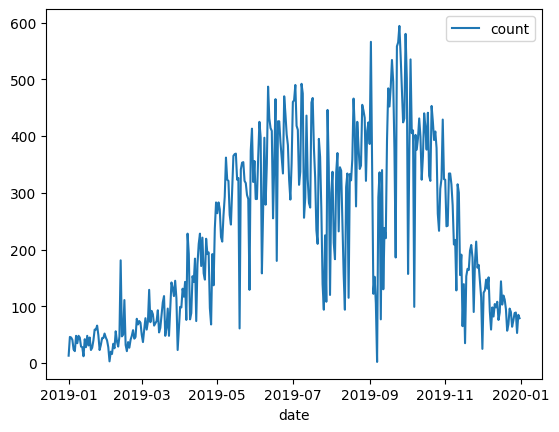

In [292]:
#날짜별 고장신고 합계
pivot = pd.pivot_table(data2019_idx, index=["date"], values="count").reset_index()
pivot.plot("date", "count")
plt.show()

In [295]:
data2019

,자전거번호,등록일시,고장구분,date,year,month
36740,SPB-11572,2019-01-01 00:04:00,체인,2019-01-01,2019,1
36741,SPB-06154,2019-01-01 01:29:00,체인,2019-01-01,2019,1
36742,SPB-16003,2019-01-01 01:35:00,단말기,2019-01-01,2019,1
36743,SPB-07713,2019-01-01 03:12:00,타이어,2019-01-01,2019,1
36744,SPB-19891,2019-01-01 05:32:00,단말기,2019-01-01,2019,1
...,...,...,...,...,...,...
118284,SPB-15338,2019-12-31 20:20:00,기타,2019-12-31,2019,12
118285,SPB-14369,2019-12-31 20:21:00,체인,2019-12-31,2019,12
118286,SPB-03922,2019-12-31 21:44:00,페달,2019-12-31,2019,12
118287,SPB-22931,2019-12-31 22:56:00,안장,2019-12-31,2019,12


<BarContainer object of 81549 artists>

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing f

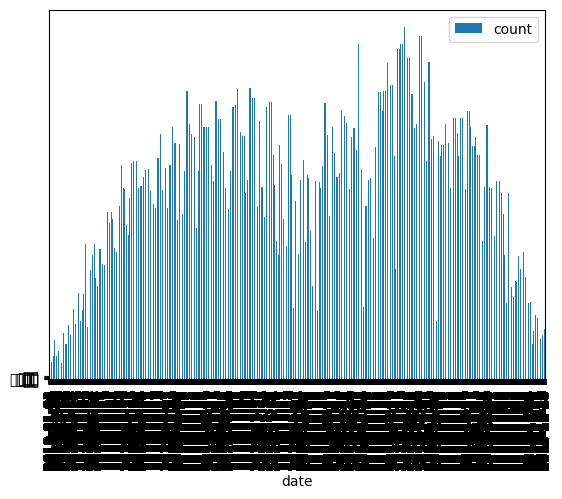

In [296]:
#고장구분 포함
# pivot2 = pd.pivot_table(data2019_idx, index=["date", "고장구분"], values="count").reset_index()
# pivot2.plot("date", "count")
# plt.show()

data2019_idx.plot(kind='bar')
plt.bar(data2019["month"], data2019["고장구분"])

In [78]:
#2019년 고장데이터 train/validation split
X_train = data2019[data2019["month"] < 12]
X_valid = data2019[data2019["month"] >= 11]

#사용할 column filtering
X = X_train[["등록일시", "고장구분"]]
V = X_valid[["등록일시", "고장구분"]]

#data 사이즈 확인
print(X.shape)
print(V.shape)

#index 등록일시로 전환
X.set_index("등록일시", inplace=True)
V.set_index("등록일시", inplace=True)

(78621, 2)
(8907, 2)


In [79]:
X.head()

,고장구분
등록일시,
2019-01-01 00:04:00,체인
2019-01-01 01:29:00,체인
2019-01-01 01:35:00,단말기
2019-01-01 03:12:00,타이어
2019-01-01 05:32:00,단말기


In [81]:
#12월 값 예측 위한 예측 날짜를 인덱스롤 한 df 생성
dec = pd.date_range(X.index[-1], freq='W', periods = 4, tz = None)

dec

DatetimeIndex(['2019-12-01 23:45:00', '2019-12-08 23:45:00',
               '2019-12-15 23:45:00', '2019-12-22 23:45:00'],
              dtype='datetime64[ns]', freq='W-SUN')

In [88]:
#model 돌리기
model_arima = ARIMA(X, order=(1,0,2))
model_arima_fit = model_arima.fit(disp=-1)

#예측 값 저장
fcast1 = model_arima_fit.forecast(4)[0]
fcast1 = pd.Series(fcast1, inex=dec)

fcast1

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
